In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection  import train_test_split

In [246]:
dataset=pd.read_csv("dataset_cleaned.csv")

In [247]:
dataset

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,Prediction
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,0
695,841769,2,1,1,1,2,1,1,1,1,0
696,888820,5,10,10,3,7,3,8,10,2,1
697,897471,4,8,6,4,3,4,10,6,1,1


In [248]:
drop=['ID','Prediction']
X=dataset.drop(drop,axis=1)
Y=dataset['Prediction']

In [249]:
X,Y

(     f1  f2  f3  f4  f5  f6  f7  f8  f9
 0     5   1   1   1   2   1   3   1   1
 1     5   4   4   5   7  10   3   2   1
 2     3   1   1   1   2   2   3   1   1
 3     6   8   8   1   3   4   3   7   1
 4     4   1   1   3   2   1   3   1   1
 ..   ..  ..  ..  ..  ..  ..  ..  ..  ..
 694   3   1   1   1   3   2   1   1   1
 695   2   1   1   1   2   1   1   1   1
 696   5  10  10   3   7   3   8  10   2
 697   4   8   6   4   3   4  10   6   1
 698   4   8   8   5   4   5  10   4   1
 
 [699 rows x 9 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 694    0
 695    0
 696    1
 697    1
 698    1
 Name: Prediction, Length: 699, dtype: int64)

In [250]:
#Train Test split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=42)
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

x_train.astype(int)

array([[ 5,  2,  1, ...,  3,  1,  1],
       [ 5,  3,  3, ...,  3,  4,  1],
       [ 1,  1,  1, ...,  3,  1,  1],
       ...,
       [ 8,  4,  7, ...,  3,  9,  2],
       [10,  8, 10, ...,  5,  1,  1],
       [ 4,  1,  2, ...,  3,  1,  1]])

In [251]:
x_train.shape,y_train .shape,x_test.shape,y_test.shape

((559, 9), (559,), (140, 9), (140,))

In [252]:
model=tf.keras.Sequential() #Using sequential API of keras

In [253]:
#Build model
def model_structure(layers):
    hidden_units=[30,40,1]
    
    initial_weights=tf.keras.initializers.GlorotNormal(seed=1)
    for i in range(layers):
        if i==0:
            model.add(tf.keras.layers.Dense(hidden_units[i],activation="relu",kernel_initializer=initial_weights,use_bias=True,bias_initializer=initial_weights,input_shape=(9,)))
            model.add(tf.keras.layers.Dropout(rate=0.5))
        if i>0 and i<layers-1:
            model.add(tf.keras.layers.Dense(hidden_units[i],activation="relu",kernel_initializer=initial_weights,use_bias=True,bias_initializer=initial_weights))
            model.add(tf.keras.layers.Dropout(rate=0.5))
        if i==layers-1:
            model.add(tf.keras.layers.Dense(hidden_units[i],activation="sigmoid",kernel_initializer=initial_weights,use_bias=True,bias_initializer=initial_weights))
            

In [254]:
def model_run(x_train,y_train,learning_rate=0.0001,num_epochs=1000,batch_size=16):
    optimizer=tf.keras.optimizers.Adam(learning_rate)
    model.compile(optimizer=optimizer,loss=tf.keras.losses.BinaryCrossentropy(),metrics=[tf.keras.metrics.BinaryAccuracy()])
    learn=model.fit(x_train,y_train,epochs=num_epochs,batch_size=batch_size,verbose=1)
    
    return learn

In [255]:
def plot(learn):
    plt.plot(learn.history["loss"])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Learning curve")
    
    plt.show()

In [256]:
model_structure(3)

In [257]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 30)                300       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_30 (Dense)            (None, 40)                1240      
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense_31 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,581
Trainable params: 1,581
Non-trainable params: 0
_________________________________________________________________


In [258]:
learn=model_run(x_train,y_train)

Epoch 1/1000
35/35 [==============================] - 1s 2ms/step - loss: 0.5453 - binary_accuracy: 0.7639
Epoch 2/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.6350 - binary_accuracy: 0.7335
Epoch 3/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.5540 - binary_accuracy: 0.7853
Epoch 4/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.5470 - binary_accuracy: 0.7603
Epoch 5/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.5466 - binary_accuracy: 0.7800
Epoch 6/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.4891 - binary_accuracy: 0.8086
Epoch 7/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.5023 - binary_accuracy: 0.8104
Epoch 8/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.4712 - binary_accuracy: 0.8050
Epoch 9/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.4625 - binary_accuracy: 0.8265
Epoch 10/1000
35/35 [================

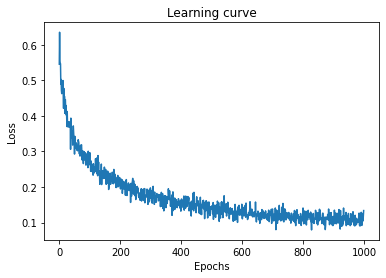

In [259]:
plot(learn)

In [260]:
#Evaluate on test

recall=model.evaluate(x_test,y_test,batch_size=16)

9/9 [==============================] - 0s 1ms/step - loss: 0.1251 - binary_accuracy: 0.9429
